## PROBLEM STATEMENT: Analyzing representation of women in various sectors based on pay-gap

> Flow of the project

In [1]:
# 1. Data selection
# 2. Pre - processing of the data
# 3. Basic statistical analysis (Explorative and Descriptive)
# 4. Using the appropriate algorithms for training
# 5. Predicting the result
# 6. Visualization
# 7. Conclusion

# Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Loading the dataset

In [3]:
# The dataset is available on UK governments website as well as kaggle

data = pd.read_csv('C:/Users/iitia/OneDrive/Desktop/DATASCIENCE INTERNSHIP WITH R/archive (1)/x.csv')

In [4]:
data

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,"""Bryanston School"",Incorporated","Bryanston House, Blandford, Dorset, DT11 0PX",00226143,85310,18.0,28.2,0.0,0.0,0.0,0.0,...,50.8,51.5,48.5,https://www.bryanston.co.uk/employment,Nick McRobb (Bursar and Clerk to the Governors),500 to 999,BRYANSTON SCHOOL INCORPORATED,False,05/04/2018 00:00:00,27/03/2018 11:42:49
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19 Smith's Place, Leith Walk, Edinburgh, EH6 8NU",SC016876,47730,2.3,-2.7,15.0,37.5,15.6,66.7,...,89.7,18.1,81.9,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2018 00:00:00,28/03/2018 16:44:25
2,118 LIMITED,"3 Alexandra Gate Ffordd Pengam, Ground Floor, ...",03951948,61900,1.7,2.8,13.1,13.6,70.0,57.0,...,50.0,58.0,42.0,NaN,"Emma Crowe (VP, Human Resources)",500 to 999,118 LIMITED,False,05/04/2018 00:00:00,27/03/2018 19:10:41
3,123 EMPLOYEES LTD,"34 Roundhay Road, Leeds, England, LS7 1AB",10530651,78300,41.0,36.0,-69.8,-157.2,50.0,73.5,...,89.0,23.0,77.0,NaN,Chloe Lines (Financial Controller),250 to 499,123 EMPLOYEES LTD,True,05/04/2018 00:00:00,04/05/2018 11:24:06
4,1610 LIMITED,"Hestercombe House, Cheddon Fitzpaine, Taunton,...",06727055,93110,-22.0,-34.0,-47.0,-67.0,25.0,75.0,...,70.0,24.0,76.0,https://www.1610.org.uk/gender-pay-gap/,Tim Nightingale (CEO),250 to 499,1610 LIMITED,True,05/04/2018 00:00:00,12/04/2018 17:03:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10560,ZPG PLC,"The Cooperage, 5 Copper Row, London, England, ...",09005884,63120,27.8,17.5,39.9,46.9,84.1,84.9,...,36.5,78.5,21.5,http://www.ar17.zpg.co.uk/application/themes/d...,Lorraine Metcalf (Chief Talent Officer),500 to 999,ZPG LIMITED,False,05/04/2018 00:00:00,15/02/2018 14:48:59
10561,ZURICH EMPLOYMENT SERVICES LIMITED,"The Grange, Bishops Cleeve, Cheltenham, Glouce...",00243883,"78300,\n82990",30.0,33.7,54.4,50.3,94.4,95.5,...,47.0,73.0,27.0,https://www.zurich.co.uk/en/about-us/corporate...,Steve Collinson (Head of UK HR),1000 to 4999,ZURICH EMPLOYMENT SERVICES LIMITED,False,05/04/2018 00:00:00,29/01/2018 10:52:37
10562,ZURICH UK GENERAL SERVICES LIMITED,"The Zurich Centre 3000 Parkway, Whiteley, Fare...",03843124,82990,25.9,26.3,45.0,27.6,94.9,95.2,...,23.0,72.0,28.0,https://www.zurich.co.uk/en/about-us/corporate...,Steve Collinson (Head of UK HR),1000 to 4999,ZURICH UK GENERAL SERVICES LIMITED,False,05/04/2018 00:00:00,29/01/2018 10:55:15
10563,ZUTO HOLDINGS LIMITED,"Winterton House, Winterton Way, Macclesfield, ...",08563366,70100,25.0,30.0,43.0,49.0,65.0,74.0,...,26.0,81.0,19.0,https://www.zuto.com/gender-pay-report/,James Wilkinson (CEO),250 to 499,ZUTO HOLDINGS LIMITED,False,05/04/2018 00:00:00,27/03/2018 10:44:14


In [5]:
# describing all the variables or features of the dataset. It includes basic statistics about the variable

data.describe(include = 'all')

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
count,10565,10565,9206,9999,10565.000000,10565.000000,10541.000000,10541.000000,10565.000000,10565.000000,...,10565.000000,10565.000000,10565.000000,7801,8888,10565,10565,10565,10565,10565
unique,10564,9263,9206,1947,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6594,7307,7,10564,2,2,10477
top,Talbot Underwriting Services Ltd,"30 Berners Street, London, England, W1T 3LR",00226143,82990,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://www.capita.com/media/3082/gender-pay-ga...,David Deacon (Executive Director of Talent),250 to 499,CHOICE SUPPORT,False,05/04/2018 00:00:00,27/03/2018 17:31:12
freq,2,22,1,446,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,28,28,4803,2,9688,8853,2
mean,NaN,NaN,NaN,NaN,14.337956,11.797340,7.679347,-21.737454,35.397246,33.930961,...,45.129153,60.810222,39.189778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,14.910729,15.841793,833.689916,1400.100574,36.331459,36.015755,...,26.225621,24.407636,24.407636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,-400.000000,-196.500000,-82000.000000,-120695.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,5.000000,0.700000,0.000000,0.000000,0.800000,0.300000,...,21.500000,41.500000,17.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,13.400000,9.200000,22.000000,5.000000,19.400000,17.200000,...,46.000000,62.700000,37.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,22.900000,21.000000,53.000000,38.000000,73.200000,70.100000,...,66.000000,82.900000,58.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
count,10565.000000,10565.000000,10541.000000,10541.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000
mean,14.337956,11.797340,7.679347,-21.737454,35.397246,33.930961,46.331661,53.668339,50.525338,49.474662,54.870847,45.129153,60.810222,39.189778
std,14.910729,15.841793,833.689916,1400.100574,36.331459,36.015755,24.127704,24.127704,26.089670,26.089670,26.225621,26.225621,24.407636,24.407636
min,-400.000000,-196.500000,-82000.000000,-120695.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.700000,0.000000,0.000000,0.800000,0.300000,27.000000,35.700000,29.500000,27.700000,34.000000,21.500000,41.500000,17.100000
50%,13.400000,9.200000,22.000000,5.000000,19.400000,17.200000,44.300000,55.700000,48.400000,51.600000,54.000000,46.000000,62.700000,37.300000
75%,22.900000,21.000000,53.000000,38.000000,73.200000,70.100000,64.300000,73.000000,72.300000,70.500000,78.500000,66.000000,82.900000,58.500000
max,159.000000,121.200000,3848.200000,3848.200000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


# Understanding the variables

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10565 entries, 0 to 10564
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EmployerName               10565 non-null  object 
 1   Address                    10565 non-null  object 
 2   CompanyNumber              9206 non-null   object 
 3   SicCodes                   9999 non-null   object 
 4   DiffMeanHourlyPercent      10565 non-null  float64
 5   DiffMedianHourlyPercent    10565 non-null  float64
 6   DiffMeanBonusPercent       10541 non-null  float64
 7   DiffMedianBonusPercent     10541 non-null  float64
 8   MaleBonusPercent           10565 non-null  float64
 9   FemaleBonusPercent         10565 non-null  float64
 10  MaleLowerQuartile          10565 non-null  float64
 11  FemaleLowerQuartile        10565 non-null  float64
 12  MaleLowerMiddleQuartile    10565 non-null  float64
 13  FemaleLowerMiddleQuartile  10565 non-null  flo

# Removing the variables with low relevance

In [8]:
data = data.drop(['EmployerName','Address','CompanyNumber','CompanyLinkToGPGInfo','DueDate','DateSubmitted','ResponsiblePerson'],axis = 1)
data

,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize,CurrentName,SubmittedAfterTheDeadline
0,85310,18.0,28.2,0.0,0.0,0.0,0.0,24.4,75.6,50.8,49.2,49.2,50.8,51.5,48.5,500 to 999,BRYANSTON SCHOOL INCORPORATED,False
1,47730,2.3,-2.7,15.0,37.5,15.6,66.7,20.3,79.7,25.4,74.6,10.3,89.7,18.1,81.9,250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False
2,61900,1.7,2.8,13.1,13.6,70.0,57.0,51.0,49.0,53.0,47.0,50.0,50.0,58.0,42.0,500 to 999,118 LIMITED,False
3,78300,41.0,36.0,-69.8,-157.2,50.0,73.5,0.0,100.0,2.0,98.0,11.0,89.0,23.0,77.0,250 to 499,123 EMPLOYEES LTD,True
4,93110,-22.0,-34.0,-47.0,-67.0,25.0,75.0,56.0,44.0,52.0,48.0,30.0,70.0,24.0,76.0,250 to 499,1610 LIMITED,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10560,63120,27.8,17.5,39.9,46.9,84.1,84.9,49.2,50.8,56.7,43.3,63.5,36.5,78.5,21.5,500 to 999,ZPG LIMITED,False
10561,"78300,\n82990",30.0,33.7,54.4,50.3,94.4,95.5,35.0,65.0,39.0,61.0,53.0,47.0,73.0,27.0,1000 to 4999,ZURICH EMPLOYMENT SERVICES LIMITED,False
10562,82990,25.9,26.3,45.0,27.6,94.9,95.2,37.0,63.0,55.0,45.0,77.0,23.0,72.0,28.0,1000 to 4999,ZURICH UK GENERAL SERVICES LIMITED,False
10563,70100,25.0,30.0,43.0,49.0,65.0,74.0,42.0,58.0,61.0,39.0,74.0,26.0,81.0,19.0,250 to 499,ZUTO HOLDINGS LIMITED,False


# Data preprocessing

# 1. Removing the rows with missing values

> As the data for non numerical variables cannot be filled with data manipulation, some rows are removed

In [9]:
data.isnull()

,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize,CurrentName,SubmittedAfterTheDeadline
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10560,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10561,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10562,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10563,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

SicCodes                     566
DiffMeanHourlyPercent          0
DiffMedianHourlyPercent        0
DiffMeanBonusPercent          24
DiffMedianBonusPercent        24
MaleBonusPercent               0
FemaleBonusPercent             0
MaleLowerQuartile              0
FemaleLowerQuartile            0
MaleLowerMiddleQuartile        0
FemaleLowerMiddleQuartile      0
MaleUpperMiddleQuartile        0
FemaleUpperMiddleQuartile      0
MaleTopQuartile                0
FemaleTopQuartile              0
EmployerSize                   0
CurrentName                    0
SubmittedAfterTheDeadline      0
dtype: int64

In [11]:
data = data.dropna(axis = 0)
data.describe(include = 'all')

,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize,CurrentName,SubmittedAfterTheDeadline
count,9979,9979.000000,9979.000000,9979.000000,9979.000000,9979.000000,9979.000000,9979.000000,9979.000000,9979.000000,9979.000000,9979.000000,9979.000000,9979.000000,9979.000000,9979,9979,9979
unique,1942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,9978,2
top,82990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250 to 499,CHOICE SUPPORT,False
freq,446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4518,2,9153
mean,NaN,14.264495,11.665478,7.058032,-23.506834,35.350145,33.846858,46.848502,53.151498,51.068724,48.931276,55.388817,44.611183,61.147430,38.852570,NaN,NaN,NaN
std,NaN,15.019659,15.865000,856.715062,1438.814927,36.276738,35.924289,24.352302,24.352302,26.262939,26.262939,26.399298,26.399298,24.561975,24.561975,NaN,NaN,NaN
min,NaN,-400.000000,-196.500000,-82000.000000,-120695.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,5.000000,0.600000,0.000000,0.000000,0.900000,0.400000,27.300000,34.700000,30.000000,26.500000,34.000000,20.650000,41.450000,17.000000,NaN,NaN,NaN
50%,NaN,13.200000,9.000000,22.200000,5.200000,19.500000,17.400000,45.000000,55.000000,49.300000,50.700000,54.700000,45.300000,63.400000,36.600000,NaN,NaN,NaN
75%,NaN,22.900000,20.900000,53.000000,38.000000,73.000000,69.700000,65.300000,72.700000,73.500000,70.000000,79.350000,66.000000,83.000000,58.550000,NaN,NaN,NaN


In [12]:
data

,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize,CurrentName,SubmittedAfterTheDeadline
0,85310,18.0,28.2,0.0,0.0,0.0,0.0,24.4,75.6,50.8,49.2,49.2,50.8,51.5,48.5,500 to 999,BRYANSTON SCHOOL INCORPORATED,False
1,47730,2.3,-2.7,15.0,37.5,15.6,66.7,20.3,79.7,25.4,74.6,10.3,89.7,18.1,81.9,250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False
2,61900,1.7,2.8,13.1,13.6,70.0,57.0,51.0,49.0,53.0,47.0,50.0,50.0,58.0,42.0,500 to 999,118 LIMITED,False
3,78300,41.0,36.0,-69.8,-157.2,50.0,73.5,0.0,100.0,2.0,98.0,11.0,89.0,23.0,77.0,250 to 499,123 EMPLOYEES LTD,True
4,93110,-22.0,-34.0,-47.0,-67.0,25.0,75.0,56.0,44.0,52.0,48.0,30.0,70.0,24.0,76.0,250 to 499,1610 LIMITED,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10560,63120,27.8,17.5,39.9,46.9,84.1,84.9,49.2,50.8,56.7,43.3,63.5,36.5,78.5,21.5,500 to 999,ZPG LIMITED,False
10561,"78300,\n82990",30.0,33.7,54.4,50.3,94.4,95.5,35.0,65.0,39.0,61.0,53.0,47.0,73.0,27.0,1000 to 4999,ZURICH EMPLOYMENT SERVICES LIMITED,False
10562,82990,25.9,26.3,45.0,27.6,94.9,95.2,37.0,63.0,55.0,45.0,77.0,23.0,72.0,28.0,1000 to 4999,ZURICH UK GENERAL SERVICES LIMITED,False
10563,70100,25.0,30.0,43.0,49.0,65.0,74.0,42.0,58.0,61.0,39.0,74.0,26.0,81.0,19.0,250 to 499,ZUTO HOLDINGS LIMITED,False


In [13]:
data = data.reset_index(drop = 'True')

# 2. Dealing with the outliers

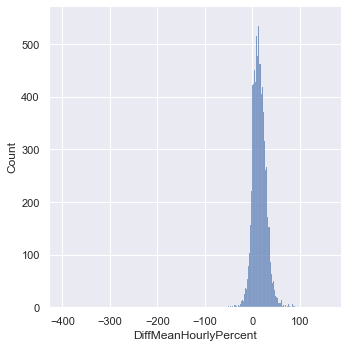

In [14]:
sns.displot(data['DiffMeanHourlyPercent'])

> Majority of the data lies in the range -100 to 100

In [15]:
data = data.sort_values(data.columns[1], ascending=False) 

In [16]:
data = data.reset_index(drop = 'True')

In [17]:
data = data.drop(data.index[9977:])

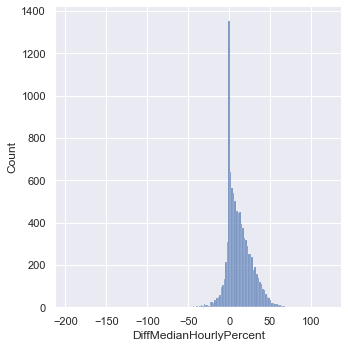

In [18]:
sns.displot(data['DiffMedianHourlyPercent'])

In [19]:
data = data.sort_values(data.columns[2], ascending=False) 
data = data.reset_index(drop = 'True')

In [20]:
data = data.drop(data.index[9956:])

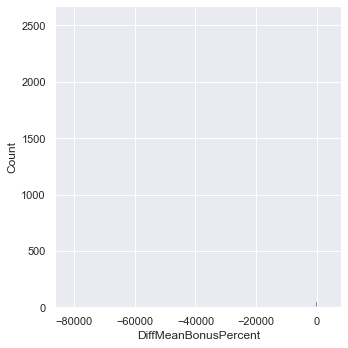

In [21]:
sns.displot(data['DiffMeanBonusPercent'])

In [22]:
data = data.sort_values(data.columns[3], ascending=False) 
data = data.reset_index(drop = 'True')

In [23]:
data = data.drop(data.index[9965:])
data = data.drop(data.index[:30])

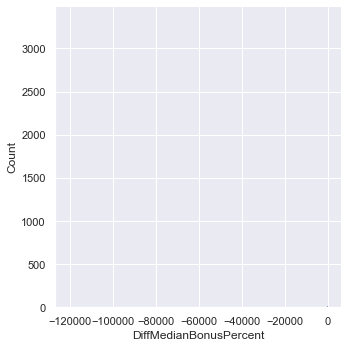

In [24]:
sns.displot(data['DiffMedianBonusPercent'])

In [25]:
data = data.sort_values(data.columns[4], ascending=False) 
data = data.reset_index(drop = 'True')

In [26]:
data = data.drop(data.index[9850:])

In [27]:
data = data.drop(data.index[:5])

In [28]:
data.describe(include = 'all')

,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize,CurrentName,SubmittedAfterTheDeadline
count,9845,9845.000000,9845.000000,9845.000000,9845.000000,9845.000000,9845.000000,9845.000000,9845.000000,9845.000000,9845.000000,9845.000000,9845.000000,9845.000000,9845.000000,9845,9845,9845
unique,1920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,9844,2
top,82990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250 to 499,CHOICE SUPPORT,False
freq,442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4443,2,9039
mean,NaN,14.487598,11.929883,20.095063,11.714982,35.462814,33.980823,46.687699,53.312301,50.925668,49.074332,55.292077,44.707923,61.129528,38.870472,NaN,NaN,NaN
std,NaN,14.098296,15.186554,65.396426,53.496181,36.323162,35.957382,24.255869,24.255869,26.166849,26.166849,26.337487,26.337487,24.511499,24.511499,NaN,NaN,NaN
min,NaN,-69.400000,-51.800000,-2068.000000,-520.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,5.000000,0.700000,0.000000,0.000000,0.900000,0.300000,27.200000,35.000000,30.000000,27.000000,34.000000,21.000000,41.500000,17.000000,NaN,NaN,NaN
50%,NaN,13.300000,9.100000,22.300000,5.600000,19.700000,17.800000,45.000000,55.000000,49.000000,51.000000,54.500000,45.500000,63.300000,36.700000,NaN,NaN,NaN
75%,NaN,23.000000,21.000000,53.000000,38.000000,73.200000,70.000000,65.000000,72.800000,73.000000,70.000000,79.000000,66.000000,83.000000,58.500000,NaN,NaN,NaN


# 3. Data Cleaning

In [29]:
data['SicCodes'] = data['SicCodes'].str.split(',').str[0]

In [30]:
data.reset_index()

,index,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize,CurrentName,SubmittedAfterTheDeadline
0,5,82990,7.0,2.0,100.0,100.0,1.0,0.0,85.0,15.0,88.0,12.0,92.0,8.0,86.0,14.0,500 to 999,PANTHER WAREHOUSING LIMITED,False
1,6,1,11.8,6.6,100.0,100.0,0.6,0.0,25.0,75.0,48.0,52.0,43.0,57.0,48.0,52.0,250 to 499,COLLEGE OF NORTH WEST LONDON,False
2,7,29320,33.4,6.6,100.0,100.0,1.5,0.0,54.0,46.0,51.0,49.0,60.0,40.0,70.0,30.0,250 to 499,IMK AUTOMOTIVE LIMITED,False
3,8,41201,-0.3,1.0,68.7,100.0,68.7,0.0,87.5,12.5,94.3,5.7,96.0,4.0,93.0,7.0,250 to 499,MARSHALL CONSTRUCTION LIMITED,False
4,9,85200,19.1,30.4,100.0,100.0,0.9,0.0,27.7,72.3,28.9,71.1,30.1,69.9,53.0,47.0,250 to 499,KIMBOLTON SCHOOL,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9840,9845,49410,-8.5,-20.5,39.0,-488.5,1.4,8.7,96.0,4.0,94.0,6.0,64.0,36.0,84.0,16.0,500 to 999,BCA LOGISTICS LIMITED,False
9841,9846,11050,-8.0,-15.0,-12.0,-492.0,71.0,72.0,78.0,22.0,91.0,9.0,79.0,21.0,70.0,30.0,500 to 999,AB INBEV UK LIMITED,False
9842,9847,86101,12.3,0.9,-31.6,-497.6,2.6,1.0,31.1,68.9,31.7,68.3,31.9,68.1,31.9,68.1,1000 to 4999,CYGNET BEHAVIOURAL HEALTH LIMITED,False
9843,9848,58110,-2.0,-34.0,57.0,-515.0,82.0,82.0,54.0,46.0,38.0,62.0,19.0,81.0,35.0,65.0,500 to 999,MACMILLAN PUBLISHERS INTERNATIONAL LIMITED,False


# Variables after cleaning

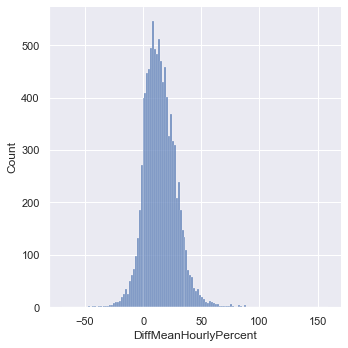

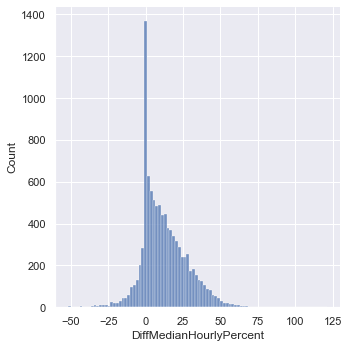

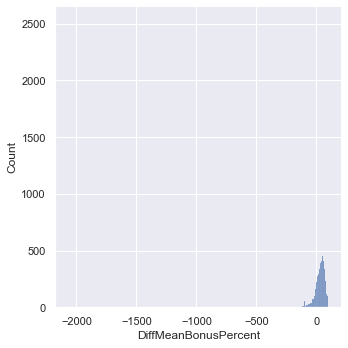

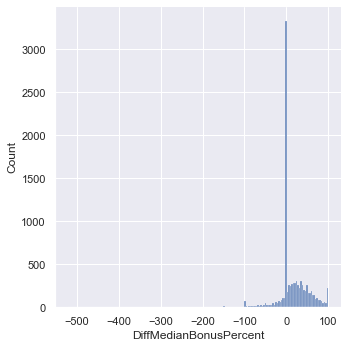

In [31]:
sns.displot(data['DiffMeanHourlyPercent'])
sns.displot(data['DiffMedianHourlyPercent'])
sns.displot(data['DiffMeanBonusPercent'])
sns.displot(data['DiffMedianBonusPercent'])

# Analyzing trends wrt the sectors

# 1. Information and communication

In [32]:
sic = data.loc[data['SicCodes'].str.contains('^58',case = False)]
sic1 = data.loc[data['SicCodes'].str.contains('^59',case = False)]
sic2= data.loc[data['SicCodes'].str.contains('^60',case = False)]
sic3= data.loc[data['SicCodes'].str.contains('^61',case = False)]
sic4= data.loc[data['SicCodes'].str.contains('^62',case = False)]
sic5= data.loc[data['SicCodes'].str.contains('^63',case = False)]

In [33]:
sic = sic.append(sic1)
sic = sic.append(sic2)
sic = sic.append(sic3)
sic = sic.append(sic4)
sic = sic.append(sic5)

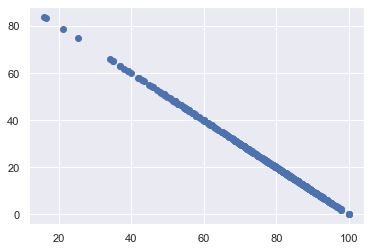

In [34]:
plt.scatter(sic['MaleTopQuartile'],sic['FemaleTopQuartile'])

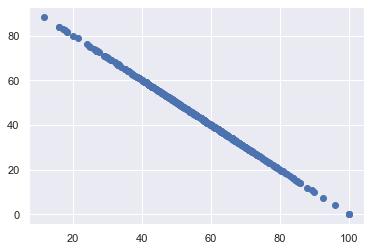

In [35]:
plt.scatter(sic['MaleLowerQuartile'],sic['FemaleLowerQuartile'])

In [36]:
a = sic['SicCodes'].tolist()
sic.describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,19.728146,17.905263,36.125629,20.351487,61.215332,59.164531,55.894737,44.105263,64.384211,35.615789,70.658810,29.341190,75.843707,24.156293
std,11.083234,12.518716,36.137891,51.448862,30.932489,31.097467,15.791614,15.791614,18.001440,18.001440,17.211781,17.211781,15.310656,15.310656
min,-20.300000,-34.000000,-316.000000,-515.000000,0.000000,0.000000,11.600000,0.000000,9.200000,0.000000,12.300000,0.000000,16.000000,0.000000
25%,12.600000,9.700000,22.000000,7.100000,34.500000,31.000000,45.000000,33.300000,52.000000,21.500000,59.000000,16.000000,68.400000,13.000000
50%,19.900000,18.000000,41.100000,26.000000,69.600000,67.000000,56.600000,43.400000,67.000000,33.000000,75.000000,25.000000,80.000000,20.000000
75%,27.000000,26.400000,55.600000,46.100000,90.000000,88.600000,66.700000,55.000000,78.500000,48.000000,84.000000,41.000000,87.000000,31.600000
max,64.000000,65.000000,100.000000,100.000000,100.000000,100.000000,100.000000,88.400000,100.000000,90.800000,100.000000,87.700000,100.000000,84.000000


# 2. Human Health and Social work activities

In [37]:
sic = data.loc[data['SicCodes'].str.contains('^86',case = False)]
sic1 = data.loc[data['SicCodes'].str.contains('^87',case = False)]
sic2= data.loc[data['SicCodes'].str.contains('^88',case = False)]

In [38]:
sic = sic.append(sic1)
sic = sic.append(sic2)

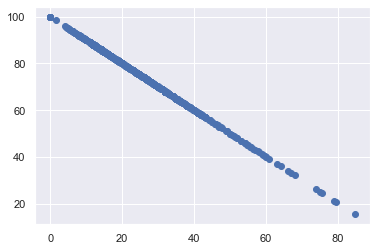

In [39]:
plt.scatter(sic['MaleTopQuartile'],sic['FemaleTopQuartile'])

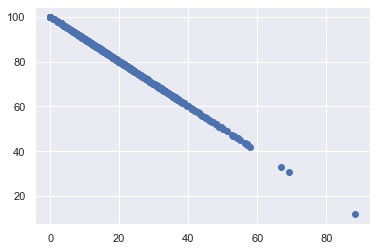

In [40]:
plt.scatter(sic['MaleLowerQuartile'],sic['FemaleLowerQuartile'])

# 3. Arts and entertainment

In [41]:
sic = data.loc[data['SicCodes'].str.contains('^90',case = False)]
sic1 = data.loc[data['SicCodes'].str.contains('^91',case = False)]
sic2= data.loc[data['SicCodes'].str.contains('^92',case = False)]
sic3= data.loc[data['SicCodes'].str.contains('^93',case = False)]

In [42]:
sic = sic.append(sic1)
sic = sic.append(sic2)
sic = sic.append(sic3)

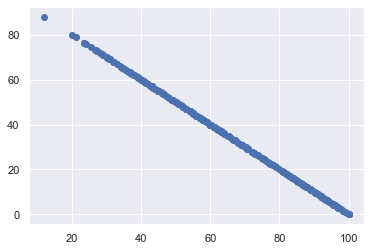

In [43]:
plt.scatter(sic['MaleTopQuartile'],sic['FemaleTopQuartile'])

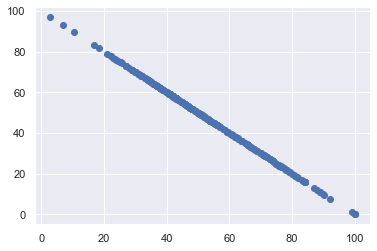

In [44]:
plt.scatter(sic['MaleLowerQuartile'],sic['FemaleLowerQuartile'])

# 4. Defence

In [45]:
sic = data.loc[data['SicCodes'].str.contains('^84',case = False)]

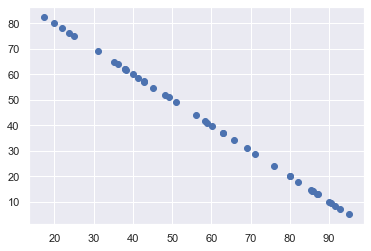

In [46]:
plt.scatter(sic['MaleTopQuartile'],sic['FemaleTopQuartile'])

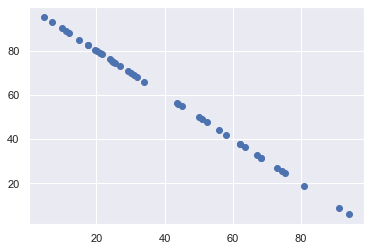

In [47]:
plt.scatter(sic['MaleLowerQuartile'],sic['FemaleLowerQuartile'])

# 5. Finance

In [48]:
sic = data.loc[data['SicCodes'].str.contains('^64',case = False)]
sic1 = data.loc[data['SicCodes'].str.contains('^65',case = False)]
sic2= data.loc[data['SicCodes'].str.contains('^66',case = False)]

In [49]:
sic = sic.append(sic1)
sic = sic.append(sic2)

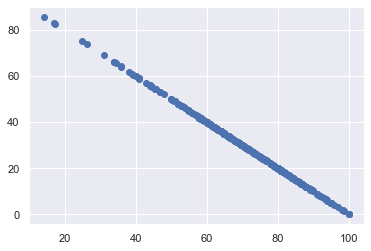

In [50]:
plt.scatter(sic['MaleTopQuartile'],sic['FemaleTopQuartile'])

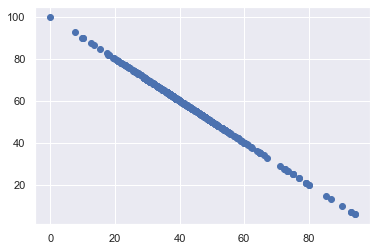

In [51]:
plt.scatter(sic['MaleLowerQuartile'],sic['FemaleLowerQuartile'])

# Changes in DiffMeanHourlyPercent

In [59]:
import datetime as dt
%matplotlib inline
pd.options.mode.chained_assignment = None

In [60]:
pay_gap_data_2017_18 = pd.read_csv('C:/Users/iitia/OneDrive/Desktop/DATASCIENCE INTERNSHIP WITH R/archive (1)/x.csv', parse_dates=True)
pay_gap_data_2018_19 = pd.read_csv('C:/Users/iitia/OneDrive/Desktop/DATASCIENCE INTERNSHIP WITH R/archive (1)/UK Gender Pay Gap Data - 2018 to 2019.csv', parse_dates=True)
pay_gap_data_2019_20 = pd.read_csv('C:/Users/iitia/OneDrive/Desktop/DATASCIENCE INTERNSHIP WITH R/archive (1)/UK Gender Pay Gap Data - 2019 to 2020.csv', parse_dates=True)
pay_gap_data_2020_21 = pd.read_csv('C:/Users/iitia/OneDrive/Desktop/DATASCIENCE INTERNSHIP WITH R/archive (1)/UK Gender Pay Gap Data - 2020 to 2021.csv', parse_dates=True)

pay_gap_data = pd.concat([pay_gap_data_2017_18, pay_gap_data_2018_19, pay_gap_data_2019_20, pay_gap_data_2020_21])

pay_gap_data.head()

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,"""Bryanston School"",Incorporated","Bryanston House, Blandford, Dorset, DT11 0PX",00226143,85310,18.0,28.2,0.0,0.0,0.0,0.0,...,50.8,51.5,48.5,https://www.bryanston.co.uk/employment,Nick McRobb (Bursar and Clerk to the Governors),500 to 999,BRYANSTON SCHOOL INCORPORATED,False,05/04/2018 00:00:00,27/03/2018 11:42:49
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19 Smith's Place, Leith Walk, Edinburgh, EH6 8NU",SC016876,47730,2.3,-2.7,15.0,37.5,15.6,66.7,...,89.7,18.1,81.9,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2018 00:00:00,28/03/2018 16:44:25
2,118 LIMITED,"3 Alexandra Gate Ffordd Pengam, Ground Floor, ...",03951948,61900,1.7,2.8,13.1,13.6,70.0,57.0,...,50.0,58.0,42.0,NaN,"Emma Crowe (VP, Human Resources)",500 to 999,118 LIMITED,False,05/04/2018 00:00:00,27/03/2018 19:10:41
3,123 EMPLOYEES LTD,"34 Roundhay Road, Leeds, England, LS7 1AB",10530651,78300,41.0,36.0,-69.8,-157.2,50.0,73.5,...,89.0,23.0,77.0,NaN,Chloe Lines (Financial Controller),250 to 499,123 EMPLOYEES LTD,True,05/04/2018 00:00:00,04/05/2018 11:24:06
4,1610 LIMITED,"Hestercombe House, Cheddon Fitzpaine, Taunton,...",06727055,93110,-22.0,-34.0,-47.0,-67.0,25.0,75.0,...,70.0,24.0,76.0,https://www.1610.org.uk/gender-pay-gap/,Tim Nightingale (CEO),250 to 499,1610 LIMITED,True,05/04/2018 00:00:00,12/04/2018 17:03:26


In [61]:
# Remove rows with no SIC codes
cleaned_sic_codes_data = pay_gap_data.dropna(subset=['SicCodes'])

# Create dataset of all companies with SIC code 62020 (Information technology consultancy activities)
it_consultancy_data = cleaned_sic_codes_data[cleaned_sic_codes_data['SicCodes'].str.contains('62020')]

it_consultancy_data.head()

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
136,ACI WORLDWIDE (EMEA) LIMITED,"55-57 Clarendon Road, Watford, Hertfordshire, ...",02310474,"62020,\n70100",11.9,20.3,27.2,37.1,84.7,76.6,...,19.7,71.1,28.9,https://www.aciworldwide.com/-/media/files/col...,David King (VP Services),Not Provided,ACI WORLDWIDE (EMEA) LIMITED,False,05/04/2018 00:00:00,09/10/2017 12:38:58
199,ADVANCED BUSINESS SOFTWARE AND SOLUTIONS LIMITED,"Ditton Park, Riding Court Road, Datchet, Berks...",03214465,62020,40.0,30.6,65.0,17.0,66.0,63.0,...,24.0,85.0,15.0,https://www.oneadvanced.com/siteassets/resourc...,Gordon Wilson (CEO),500 to 999,ADVANCED BUSINESS SOFTWARE AND SOLUTIONS LIMITED,False,05/04/2018 00:00:00,03/04/2018 10:17:31
201,ADVANCED HEALTH AND CARE LIMITED,"Ditton Park, Riding Court Road, Datchet, Berks...",02939302,62020,1.9,5.7,-77.0,-202.0,49.0,40.0,...,17.0,83.0,17.0,https://www.oneadvanced.com/siteassets/resourc...,Gordon Wilson (CEO),250 to 499,ADVANCED HEALTH AND CARE LIMITED,False,05/04/2018 00:00:00,03/04/2018 10:23:20
208,ADVISERPLUS BUSINESS SOLUTIONS LIMITED,"Woodcourt, Riverside Park Southwood Road, Brom...",04222727,"62020,\n70100",8.0,14.9,57.6,0.0,35.1,33.3,...,74.2,40.0,60.0,NaN,Nick Bradley (Chief Executive Officer),250 to 499,ADVISERPLUS BUSINESS SOLUTIONS LIMITED,False,05/04/2018 00:00:00,27/03/2018 13:13:11
317,ALFA FINANCIAL SOFTWARE LIMITED,"Moor Place, 1 Fore Street Avenue, London, Unit...",02482325,62020,19.3,15.0,22.3,16.3,62.3,46.0,...,23.3,84.4,15.6,https://www.alfasystems.com/eu/media/gender-pa...,Andrew Denton (CEO),250 to 499,ALFA FINANCIAL SOFTWARE LIMITED,False,05/04/2018 00:00:00,20/03/2018 16:57:27


In [64]:
it_consultancy_data = it_consultancy_data.reset_index(drop = 'True')

In [65]:
it_consultancy_data.loc[:,'DueDate'] = pd.to_datetime(it_consultancy_data['DueDate'])
it_consultancy_data.loc[:,'ReportingYear'] = it_consultancy_data['DueDate'].dt.year

<AxesSubplot:xlabel='ReportingYear', ylabel='DiffMeanHourlyPercent'>

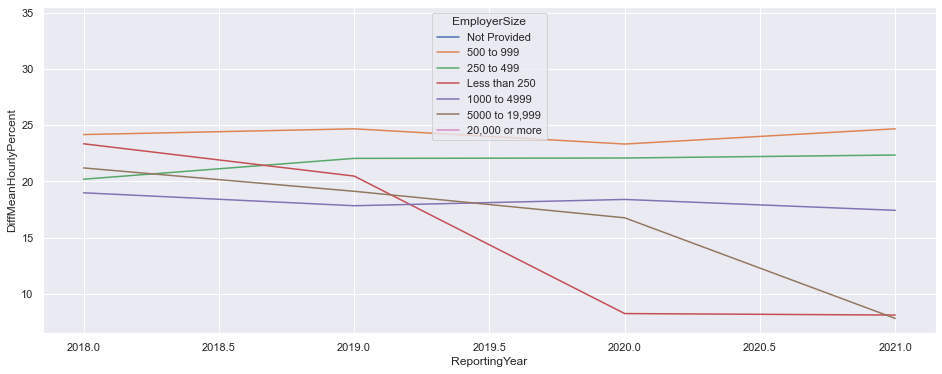

In [66]:
plt.figure(figsize=(16,6))

sns.lineplot(data=it_consultancy_data, x="ReportingYear", y="DiffMeanHourlyPercent", hue="EmployerSize", ci=None)

<AxesSubplot:xlabel='ReportingYear', ylabel='DiffMeanBonusPercent'>

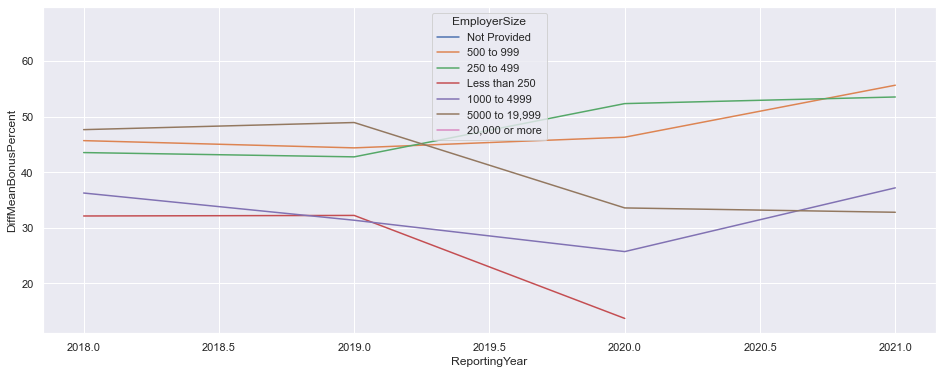

In [67]:
plt.figure(figsize=(16,6))

sns.lineplot(data=it_consultancy_data, x="ReportingYear", y="DiffMeanBonusPercent", hue="EmployerSize", ci=None)